# New TEST

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
from itertools import zip_longest


In [ ]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'}

In [ ]:

def scrape_property_listing(url):
    """
    Scrapes the details of a single property listing from propertyfinder.sa and saves the results to a CSV file.

    Parameters:
    url (str): The URL of the property listing page to scrape.

    Returns:
    None
    """
    # Send a GET request to the URL
    response = requests.get(url)

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract the details
    title = soup.find('h1', {'class': 'listing__title'}).text.strip()
    price = soup.find('div', {'class': 'listing__price'}).text.strip()
    bedrooms = soup.find('div', {'class': 'listing__key-facts-item', 'data-key': 'bedrooms'}).find('div', {'class': 'listing__key-facts-item-value'}).text.strip()
    bathrooms = soup.find('div', {'class': 'listing__key-facts-item', 'data-key': 'bathrooms'}).find('div', {'class': 'listing__key-facts-item-value'}).text.strip()
    area = soup.find('div', {'class': 'listing__key-facts-item', 'data-key': 'area'}).find('div', {'class': 'listing__key-facts-item-value'}).text.strip()
    description = soup.find('div', {'class': 'listing__description'}).text.strip()

    # Write the results to a CSV file
    with open('property_listing.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Title', 'Price', 'Bedrooms', 'Bathrooms', 'Area', 'Description'])
        writer.writerow([title, price, bedrooms, bathrooms, area, description])

    print('Property details saved to property_listing.csv')


In [ ]:
page_numbers=20
url="https://www.propertyfinder.sa/en/rent/properties-for-rent.html?page="
links=[]
locations=[]

for i in range(35):
  result=requests.get(url+str(i),headers=headers)
  src=result.content
  soup=BeautifulSoup(src,"lxml")
  properties = soup.find_all('a', {'class': 'card__link'})
  location= soup.find_all('span', {'class': 'card-specifications__location-text'})
  for s in range(len(properties)):
    links.append("https://www.propertyfinder.sa"+properties[s].get('href'))
    locations.append(location[s].text.strip())



In [ ]:

#len(links)

len(locations)

816

In [ ]:
import re
from geopy.geocoders import Nominatim

def get_lat_long(location):
    geolocator = Nominatim(user_agent="my_app")
    location = geolocator.geocode(location)
    if location is None:
        return None, None
    else:
        return location.longitude, location.latitude
def clean_data(data):
    data =data.replace('\n', ' ').replace('\t', ' ').strip()
    return data.replace(',', '').strip().split()[0]
def cleanprice(data):
    price = data
    digits = re.findall('\d+', price) # find all digits in the string
    price_digits = ''.join(digits) # concatenate the digits into a string
    return price_digits


In [ ]:
nheaders = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'}

In [ ]:
result_data=[]
for i in range(len(links)):
   result=requests.get(links[i],headers=headers)
   src=result.content
   soup=BeautifulSoup(src,"html.parser")
   title=i
   #price

   price_element = soup.find("div",{"class":"property-price__price"})

   if price_element is not None:
        price = price_element.text.strip()
        price = cleanprice(price)
   else:
        price="none"

   lis=soup.find_all('li',{'class': 'property-facts__item'})
   property_type = "none"
   bedrooms = "none"
   plot_width = "none"
   street_width = "none"
   property_age = "none"
   property_size = "none"
   bathrooms = "none"
   plot_width = "none"
   street_direction = "none"

   for lin in lis:
     if(lin.find("span").text=="Property type:"):
       property_type=lin.find("div",{"class":"property-facts__value" }).text.strip()


     # bedrooms
     if(lin.find("span").text=="Bedrooms:"):
       bedrooms =lin.find("div",{"class":"property-facts__value" }).text.strip()

    #Plot length:
     if(lin.find("span").text=="Plot length:"):
       plot_width =lin.find("div",{"class":"property-facts__value" }).text.strip()

       #Street width:
     if(lin.find("span").text=="Street width:"):
       street_width =lin.find("div",{"class":"property-facts__value" }).text.strip()

        # Property age:
     if(lin.find("span").text=="Property age:"):
       property_age =lin.find("div",{"class":"property-facts__value" }).text.strip()

         # Property size:

     if(lin.find("span").text=="Property size:"):
       property_size =lin.find("span",{"class":"property-facts__text" }).text.strip()
       property_size=clean_data(property_size)

     if(lin.find("span").text=="Bathrooms:"):
       bathrooms =lin.find("div",{"class":"property-facts__value" }).text.strip()

     if(lin.find("span").text=="Plot width:"):
       plot_width =lin.find("div",{"class":"property-facts__value" }).text.strip()
     if(lin.find("span").text=="Street direction:"):
       street_direction  =lin.find("div",{"class":"property-facts__value" }).text.strip()
   # Create a list of the extracted information
   property_info = [title,property_type, bedrooms, plot_width, street_width, property_age, property_size, bathrooms, plot_width, street_direction ,locations[i],price,links[i]]
   result_data.append(property_info)

   print(i)



In [ ]:
with open('propertyfinder.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['title','Property type', 'Bedrooms', 'Plot width', 'Street width', 'Property age', 'Property size', 'Bathrooms', 'Plot width', 'Street direction','location', 'Price','url'])
        for row in result_data:
            writer.writerow(row)

# Data Overview

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load the propertyfinder.csv file into a pandas dataframe
df = pd.read_csv('propertyfinder.csv')

df = df.iloc[1:]
selected_columns = ['Property type', 'Bedrooms', 'Plot width', 'Street width', 'Property age', 'Property size', 'Bathrooms', 'Plot width', 'Street direction','location', 'Price','url']
df = df[selected_columns]

# Print the first 5 rows of the dataframe
print(df.head())

  Property type                                Bedrooms     Plot width  \
1     Apartment                                       1  Not available   
2      Compound  4\n\t\t\t\t\t\t\t\t\t+\n\t\t\t\t\tMaid             21   
3     Apartment                                       1             20   
4      Compound                                       1             10   
5     Apartment                                       1             20   

    Street width   Property age Property size Bathrooms     Plot width  \
1  Not available  Not available           893         2  Not available   
2             10  Not available          4273         7             21   
3             16              1           484         1             20   
4             10  Not available           861         1             10   
5             20              1           431         1             20   

  Street direction                                 location   Price  \
1    Not available        Al Yarmuk, Ea

In [ ]:
# Get summary statistics of the numerical columns
stats = df.describe()
print(stats)



       Property type Bedrooms Plot width Street width   Property age  \
count            815      813        815          815            815   
unique             8       19         78           30             24   
top        Apartment        3         10           20  Not available   
freq             568      180        196          224            285   

       Property size Bathrooms Plot width Street direction  \
count            815       813        815              815   
unique           174         9         78               11   
top             none         3         10    Not available   
freq              77       221        196              380   

                                        location  Price  \
count                                        815    794   
unique                                       145    164   
top     As Salamah, Jeddah, Makkah Al Mukarramah  55000   
freq                                          44     41   

                                

In [ ]:
# Replace all occurrences of "none" with NaN
df = df.replace("none", np.nan)

In [ ]:
# Replace all occurrences of "Not available" with NaN
df = df.replace("Not available", np.nan)

In [ ]:
# Get the correlation matrix between numerical columns
corr = df.corr()
print(corr)

Empty DataFrame
Columns: []
Index: []


In [ ]:
unique_vals = {}
for col in ['Property type', 'Street direction','location']:
    unique_vals[col] = len(df[col].unique())
print(unique_vals)

{'Property type': 8, 'Street direction': 10, 'location': 145}


In [ ]:
# Get the number of properties in each location
prop_count = df['location'].value_counts()
print(prop_count)

As Salamah, Jeddah, Makkah Al Mukarramah    44
Al Munsiyah, East Riyadh, Ar Riyadh         42
Al Faiha, Jeddah, Makkah Al Mukarramah      38
Ash Shati, Jeddah, Makkah Al Mukarramah     33
Tuwaiq, West Riyadh, Ar Riyadh              30
                                            ..
As Salamah, Makkah Al Mukarramah             1
Al Ghoroub, West Riyadh, Ar Riyadh           1
Al Aqul, Al Madinah Al Munawwarah            1
Ash Sheraa, Jeddah, Makkah Al Mukarramah     1
Al Riyadh, Ar Riyadh                         1
Name: location, Length: 145, dtype: int64


In [ ]:
# Remove any rows with missing values
df = df.dropna()

In [ ]:
df['Bedrooms'] = df['Bedrooms'].astype(str)

# Extract number of bedrooms and maid's room as separate columns
df[['Bedrooms', 'Maid']] = df['Bedrooms'].str.extract('(\d+)\+*(\w*)', expand=True)

# Convert 'Bedrooms' column to numeric data type
df['Bedrooms'] = pd.to_numeric(df['Bedrooms'])

# Fill any missing values in 'Maid' column with 0
df['Maid'] = df['Maid'].fillna(0)
df['Bedrooms']


5      1.0
6      5.0
12     2.0
13     2.0
19     1.0
      ... 
799    2.0
804    4.0
805    7.0
806    4.0
815    4.0
Name: Bedrooms, Length: 302, dtype: float64

In [ ]:
# Perform exploratory data analysis
print(df.describe())

         Bedrooms
count  293.000000
mean     3.068259
std      1.495009
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      7.000000


In [ ]:
# Get the median price of each property type
median_prices = df.groupby('Property type')['Price'].median()
print(median_prices)

Property type
Apartment                 45000.0
Compound                  65000.0
Duplex                    55000.0
Hotel/Hotel Apartment    350000.0
Villa                    120000.0
Name: Price, dtype: float64


In [ ]:
# Get the number of properties in each location
prop_count = df['location'].value_counts()
print(prop_count)

As Salamah, Jeddah, Makkah Al Mukarramah    23
Ar Ruwais, Jeddah, Makkah Al Mukarramah     15
Al Faiha, Jeddah, Makkah Al Mukarramah      15
An Nahdah, Jeddah, Makkah Al Mukarramah     13
Al Hamra, Jeddah, Makkah Al Mukarramah      13
                                            ..
Ar Rawabi, East Riyadh, Ar Riyadh            1
Al Manar, Jeddah, Makkah Al Mukarramah       1
An Nuzhah, North Riyadh, Ar Riyadh           1
Al Izdihar, North Riyadh, Ar Riyadh          1
Al Yarmuk, East Riyadh, Ar Riyadh            1
Name: location, Length: 83, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

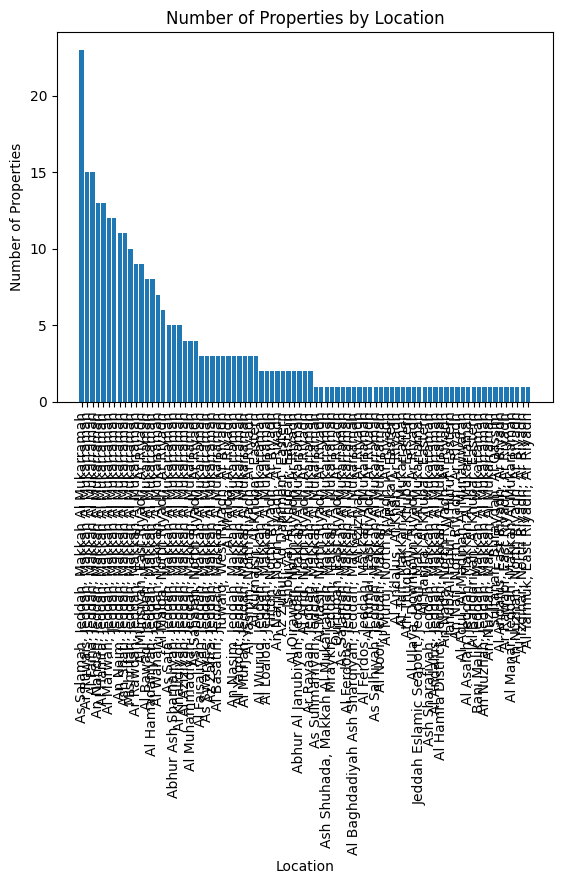

In [ ]:
# Create a bar chart showing the number of properties in each location
location_counts = df['location'].value_counts()
plt.bar(location_counts.index, location_counts.values)
plt.xticks(rotation=90)
plt.title('Number of Properties by Location')
plt.xlabel('Location')
plt.ylabel('Number of Properties')
plt.show()

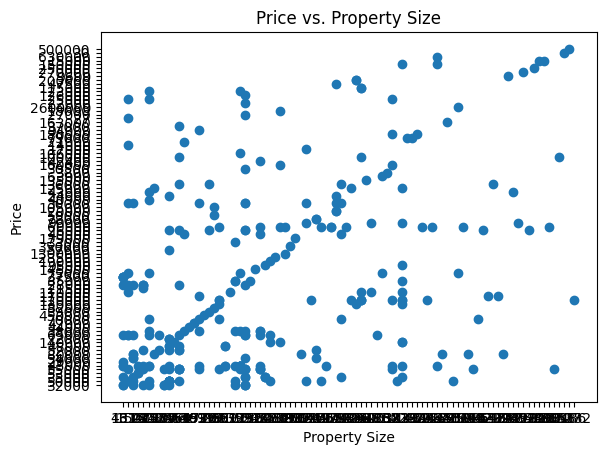

In [ ]:
# Create a scatter plot showing the relationship between price and property size
plt.scatter(df['Property size'], df['Price'])
plt.title('Price vs. Property Size')
plt.xlabel('Property Size')
plt.ylabel('Price')
plt.show()

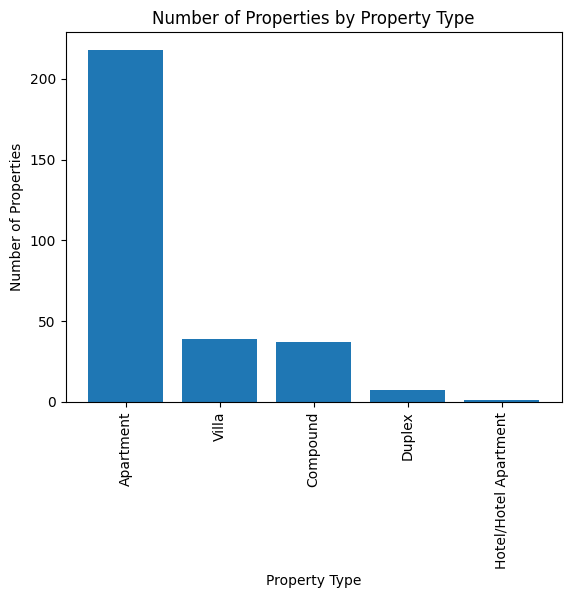

In [ ]:
# Create a bar chart showing the number of properties in each property type category
property_type_counts = df['Property type'].value_counts()
plt.bar(property_type_counts.index, property_type_counts.values)
plt.xticks(rotation=90)
plt.title('Number of Properties by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Number of Properties')
plt.show()

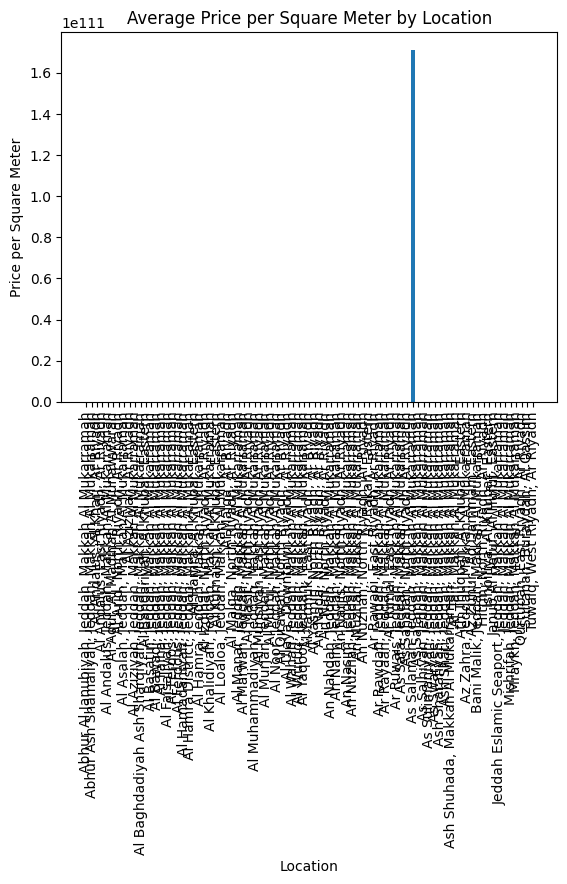

In [ ]:
# Convert the 'Property size' column to a float data type
df['Property size'] = df['Property size'].astype(float)

# Calculate the average property size by location
avg_size_by_location = df.groupby('location')['Property size'].mean()

# Calculate the average price per square meter by location
avg_price_by_location = df.groupby('location')['Price'].mean() / avg_size_by_location

# Create a bar chart showing the average price per square meter by location
plt.bar(avg_price_by_location.index, avg_price_by_location.values)
plt.xticks(rotation=90)
plt.title('Average Price per Square Meter by Location')
plt.xlabel('Location')
plt.ylabel('Price per Square Meter')
plt.show()

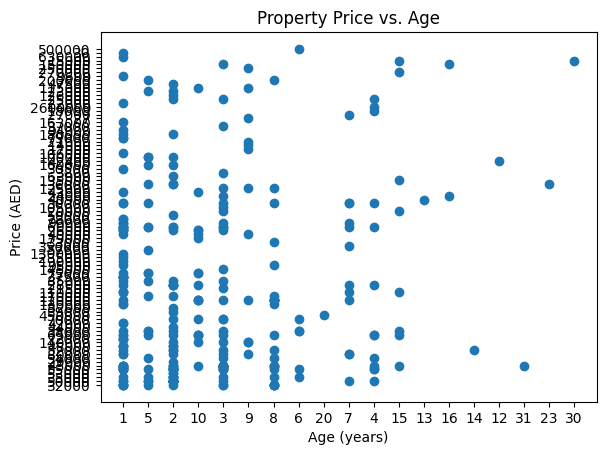

In [ ]:
# Create a scatter plot showing the relationship between property price and age
plt.scatter(df['Property age'], df['Price'])
plt.title('Property Price vs. Age')
plt.xlabel('Age (years)')
plt.ylabel('Price (AED)')
plt.show()